# Etude du modèle de mouvement à 8 paramètres

Soit un champ de mouvement paramétré par les coefficients $a_1 a_2 a_3 a_4 a_5 a_6 a_7 a_8$, qui à tout point $(x,y)$ associe un vecteur $(u(x,y),v(x,y))$

$$ u(x,y) = a_{1}+a_{2}x+a_{3}y+a_{4}x^{2}+a_{5}xy $$
$$ v(x,y) = a_{6}+a_{7}x+a_{8}y+a_{4}xy+a_{5}y^{2} $$

qui peut s'écrire aussi $$ [u v ]^T = M . A $$
où $$ A= [a_1 a_2 a_3 a_4 a_5 a_6 a_7 a_8]$$

On vous laisse chercher l'expression de $M$ et vérifier le résultat dans le code ci-dessous (fonction calculant la matrice M représentant cette transformation linéaire) :

In [9]:
#  fonction qui calcule M en un point (x,y)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import *

def motion_matrix(x,y):
    return (array( [[1,0],[x,0],[y,0],[x*x,x*y],[x*y,y*y],[0,1],[0,x],[0,y]]).T)

In [12]:
# Une fonction qui calcule puis trace un champ de vecteur quand on lui donne des paramètres
# le champ de vecteur va de -SIZ/2 à SIZ/2 horizontalement et verticalement donc SIZ+1 pas dans chaque direction

#from matplotlib import *

def trace_champ(A,letitre):
    SIZ=10
    PX,PY = meshgrid( arange(-SIZ/2,SIZ/2+1),arange(-SIZ/2,SIZ/2+1) )
    MX= zeros((SIZ+1,SIZ+1))
    MY= zeros((SIZ+1,SIZ+1))
    RX= range(0,SIZ+1)
    RY= range(0,SIZ+1)
    for x in RX:
        for y in RY:
            xx= x-SIZ/2
            yy= y-SIZ/2
            motion_vector=motion_matrix(xx,yy).dot(A)
            MX[x,y]=motion_vector[0]
            MY[x,y]=motion_vector[1]
    plt.figure(figsize=(SIZ/2,SIZ/2))
    plt.quiver(PX,PY,MX.T, MY.T)
    plt.axis([-SIZ/2-1, SIZ/2+1, -SIZ/2-1, SIZ/2+1])
    plt.title(letitre)

### Cas particulier simple : la translation   $$ u(x,y) = a_{1}$$ $$ v(x,y) = a_{6}$$ 

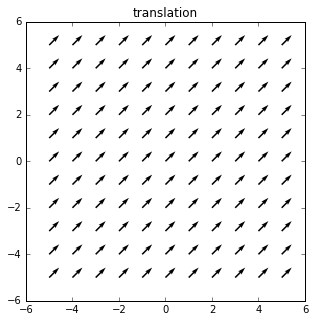

In [13]:
A = array([[1,0,0,0,0,1,0,0]]).T
trace_champ(A,"translation")


### Cas particulier simple : la divergence  $$ u(x,y) = a_{2}x $$ $$ v(x,y) = a_{8}y $$

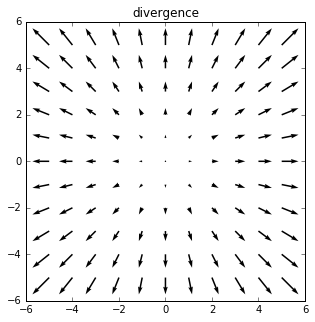

In [14]:
A = array([[0,1,0,0,0,0,0,1]]).T
trace_champ(A,"divergence")

### Cas particulier simple : la rotation      $$ u(x,y) = a_{3}y $$ $$ v(x,y) = a_{7}x $$ 

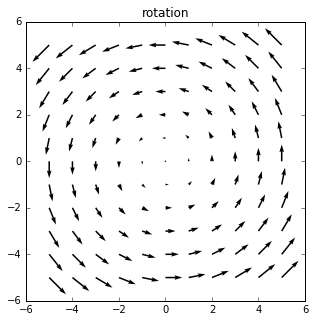

In [15]:
A = array([[0,0,-1,0,0,0,1,0]]).T
trace_champ(A,"rotation")

### Cas quelconque combinant divers mouvements élémentaires  $$ u(x,y) = a_{1}+a_{2}x+a_{3}y+a_{4}x^{2}+a_{5}xy $$ $$ v(x,y) = a_{6}+a_{7}x+a_{8}y+a_{4}xy+a_{5}y^{2} $$ 

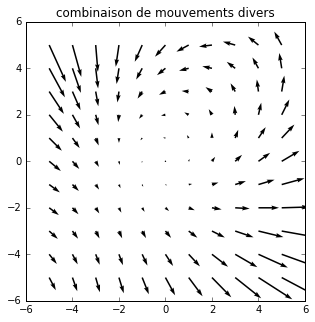

In [16]:
A = array([[-0.2,0.3,-1,0.3,-0.3,0.2,1,0.3]]).T
trace_champ(A,"combinaison de mouvements divers")

# Calcul d'un modèle de mouvement à 8 paramètres à partir de 4 appariements 

On traite maintenant l'estimation des 8 paramètres $a_i$

$$ u(x,y) = a_{1}+a_{2}x+a_{3}y+a_{4}x^{2}+a_{5}xy $$
$$ v(x,y) = a_{6}+a_{7}x+a_{8}y+a_{4}xy+a_{5}y^{2} $$

à partir de 4 appariements $(i=1,\dots, 4)$ supposés entre 2 images $I_1$ et $I_2$, c.a.d. 4 paires $(x^i_1,y^i_1),(x^i_2,y^i_2)$ d'où on déduit immédiatement $(x^i_1,y^i_1),(u^i_2=x^i_2-x^i_1,v^i_2=y^i_2-y^i_1)$


In [17]:
# x,y : coordonnées du points dans la 1ere image, u,v = vecteur vitesse estimé
# considérons 4 paires de points

x,y,u,v = -3,-3,-1,-1
M = motion_matrix(x,y)
B = array( ([u],[v]) )

x,y,u,v = 7,7,1,1
M = concatenate((M,motion_matrix(x,y)))
B = concatenate((B,array( ([u],[v]) )))

x,y,u,v = 3,7,1,-1
M = concatenate((M,motion_matrix(x,y)))
B = concatenate((B,array( ([u],[v]) )))

x,y,u,v = 7,3,-1,1
M = concatenate((M,motion_matrix(x,y)))
B = concatenate((B,array( ([u],[v]) )))

print("Matrice M issue des coordonnees")
print(M)
print("Vecteur B ")
print(B)

Matrice M issue des coordonnees
[[ 1 -3 -3  9  9  0  0  0]
 [ 0  0  0  9  9  1 -3 -3]
 [ 1  7  7 49 49  0  0  0]
 [ 0  0  0 49 49  1  7  7]
 [ 1  3  7  9 21  0  0  0]
 [ 0  0  0 21 49  1  3  7]
 [ 1  7  3 49 21  0  0  0]
 [ 0  0  0 21  9  1  7  3]]
Vecteur B 
[[-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]]


# Estimation des 8 paramètres du modèle de mouvement  

In [18]:
print("Résultat paramètres ai")
A=mat(M).I*mat(B)
print(A)

Résultat paramètres ai
[[-1.1875 ]
 [-0.31875]
 [ 0.36875]
 [ 0.01875]
 [ 0.01875]
 [-1.1875 ]
 [ 0.36875]
 [-0.31875]]


$a=M^{-1}.B$

# Tracé du champ de mouvement estimé pour toute l'image 

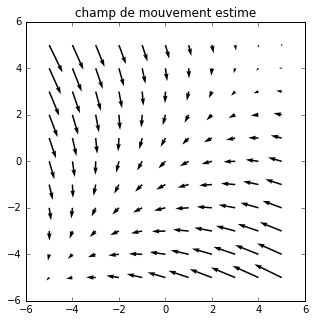

In [19]:

trace_champ(A,"champ de mouvement estime")

# Ajout d'appariements et résolution du système par moindres carrés 

In [20]:
# On ajoute 2 appariements, rendant le système d'équations sur-déterminé

x,y,u,v =3,-2,2,-2
M = concatenate((M,motion_matrix(x,y)))
B = concatenate((B,array( ([u],[v]) )))

x,y,u,v = 4,6,0,0
M = concatenate((M,motion_matrix(x,y)))
B = concatenate((B,array( ([u],[v]) )))

Le modèle de mouvement est mis à jour, cette fois par moindres-carrés car nombre d'équations > nombre d'inconnues :

$$ a = (M^TM)^{-1}(M^TB)$$

In [21]:
A = (mat(M).T*mat(M)).I*(mat(M).T*mat(B))

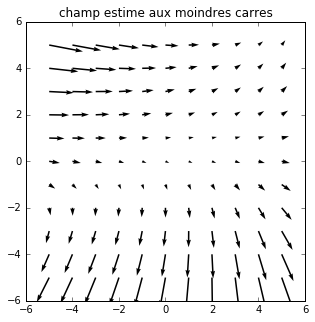

In [22]:
trace_champ(A,"champ estime aux moindres carres")